# **Comprehensive Model**

##### *Imports*

In [24]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# For ML 
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from model_utils import *
# Pandas' options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## **Merge Sub-datasets for the Comprehensive Dataset**

In [25]:
cols_drop = ['result', 'league_id', 'season_id', 'season_name_codes']
# Venue Sub-dataset
venue_file = pd.read_csv('../../Data/Modeling_Final/1_venue.csv').set_index('id')
print(f'venue_file: {venue_file.shape}')
# Standings Sub-dataset
standings_file = pd.read_csv('../../Data/Modeling_Final/2_standings.csv').set_index('id').drop(columns=cols_drop)
print(f'standings_file: {standings_file.shape}')
# Form and Rest Sub-dataset
form_file = pd.read_csv('../../Data/Modeling_Final/3_form_rest.csv').set_index('id').drop(columns=cols_drop)
print(f'form_file: {form_file.shape}')
# Stats Sub-dataset
stats_file = pd.read_csv('../../Data/Modeling_Final/4_stats.csv').set_index('id').drop(columns=cols_drop)
print(f'stats_file: {stats_file.shape}')
# Odds Sub-dataset
odds_file = pd.read_csv('../../Data/Modeling_Final/5_odds.csv').set_index('id').drop(columns=cols_drop)
print(f'odds_file: {odds_file.shape}')
# Team Attributes Sub-dataset
team_file = pd.read_csv('../../Data/Modeling_Final/6_team_attr.csv').set_index('id').drop(columns=cols_drop)
print(f'team_file: {team_file.shape}')
# Player Attributes Sub-dataset
player_file = pd.read_csv('../../Data/Modeling_Final/7_players.csv').set_index('id').drop(columns=cols_drop)
print(f'player_file: {player_file.shape}')

venue_file: (10536, 24)
standings_file: (10536, 181)
form_file: (10438, 255)
stats_file: (10205, 720)
odds_file: (8415, 776)
team_file: (10536, 28)
player_file: (10536, 123)


In [26]:
# Merge sub-datasets 
complete_df = venue_file.merge(standings_file, left_index=True, right_index=True)\
    .merge(form_file, left_index=True, right_index=True)\
        .merge(stats_file, left_index=True, right_index=True)\
            .merge(odds_file, left_index=True, right_index=True)\
                .merge(team_file, left_index=True, right_index=True)\
                    .merge(player_file, left_index=True, right_index=True)
# Drop NA
complete_df.dropna(inplace=True)
# Categorical columns
categorical_columns = ['result', 'colors_home_color','colors_away_color', 'league_id', 'season_id', 'venue_id', 'venue_city', 'season_name_codes', 'home_country_id', 'venue_surface_isgrass', 'night_game', 'home_not_home', 'travel_outside_state', 'formations_home_formation', 'formations_away_formation', 'home_is_major', 'away_is_major', 'isrival_home', 'isrival_away']
rank_cols = complete_df.filter(regex='rank').columns.tolist() + ['ROUND']
complete_df[categorical_columns + rank_cols] = complete_df[categorical_columns + rank_cols].astype('category')
categorical_columns.remove('result')
# Numeric columns
float_cols = complete_df.select_dtypes(np.float_).columns.tolist()
int_cols = complete_df.select_dtypes(np.int_).columns.tolist()
numeric_columns = float_cols + int_cols
complete_df.loc[:, float_cols] = complete_df.loc[:, float_cols].apply(pd.to_numeric, downcast='float')
complete_df.loc[:, int_cols] = complete_df.loc[:, int_cols].apply(pd.to_numeric, downcast='integer')

print('DataFrame shape: ', complete_df.shape)
complete_df.head(2)

DataFrame shape:  (8241, 2107)


result league_id season_id venue_id           venue_city  attendance  \
id                                                                             
1726170      1       301      6405     4451               Monaco        9170   
1726169      2       301      6405     2042  Longeville-lès-Metz       14595   

         venue_capacity home_country_id venue_surface_isgrass       temp  \
id                                                                         
1726170           18523           75285                     1  17.799999   
1726169           26661              17                     1  20.799999   

         cloudcover  humidity  pressure  visibility  winddir  windspeed  \
id                                                                        
1726170           0        76      1014          10       12       0.00   
1726169          17        57      1018          30      245       5.58   

        night_game  travel_dist(km) colors_home_color colors_away_color  \
id                                                                        
1726170          1              482                RE                 W   
1726169          0              687                RE                RE   

        home_not_home travel_outside_state  attendance_ratio  \
id                                                             
1726170             0                    1          0.495060   
1726169             0                    0          0.547429   

        season_name_codes ROUND  Won_FT_TO_H  Drawn_FT_TO_H  Lost_FT_TO_H  \
id                                                                          
1726170                 1     0           22              5             3   
1726169                 1     0           11              9            16   

         GF_FT_TO_H  GA_FT_TO_H  GD_FT_TO_H  Points_FT_TO_H rank_FT_TO_H  \
id                                                                         
1726170          87          26          61              71            1   
1726169          38          70         -32              42           13   

         W%_FT_TO_H  D%_FT_TO_H  L%_FT_TO_H  GFxGame_FT_TO_H  GAxGame_FT_TO_H  \
id                                                                              
1726170    0.733333    0.166667    0.100000         2.900000         0.866667   
1726169    0.305556    0.250000    0.444444         1.055556         1.944444   

         GDxGame_FT_TO_H  PointsxGame_FT_TO_H  Won_1H_TO_H  Drawn_1H_TO_H  \
id                                                                          
1726170         2.033333             2.366667           18              8   
1726169        -0.888889             1.166667            9             14   

         Lost_1H_TO_H  GF_1H_TO_H  GA_1H_TO_H  GD_1H_TO_H  Points_1H_TO_H  \
id                                                                          
1726170             4          37           9          28              62   
1726169            13          16          23          -7              41   

        rank_1H_TO_H  W%_1H_TO_H  D%_1H_TO_H  L%_1H_TO_H  GFxGame_1H_TO_H  \
id                                                                          
1726170            1        0.60    0.266667    0.133333         1.233333   
1726169           12        0.25    0.388889    0.361111         0.444444   

         GAxGame_1H_TO_H  GDxGame_1H_TO_H  PointsxGame_1H_TO_H  Won_2H_TO_H  \
id                                                                            
1726170         0.300000         0.933333             2.066667           20   
1726169         0.638889        -0.194444             1.138889            9   

         Drawn_2H_TO_H  Lost_2H_TO_H  GF_2H_TO_H  GA_2H_TO_H  GD_2H_TO_H  \
id                                                                         
1726170              5             5          50          17          33   
1726169             11            16          22          47         -25   

         Points_2H_TO_H rank_2H_TO_

## ***Best Model***

##### *Split Data & Pre-Processing*

In [27]:
# Split training/test sets
X = complete_df.loc[:, 'league_id':]
y = complete_df['result'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=14, stratify=y)
# Sets shape
print('X train shape: ', X_train.shape, '. Y train shape: ',y_train.shape, '\nX test shape: ', X_test.shape, '. Y test shape: ', y_test.shape)
# Pre-processing methods
full_pipeline_mms = ColumnTransformer([
    ('num', MinMaxScaler(), numeric_columns), 
    ('cat_hot', OneHotEncoder(handle_unknown = 'ignore'), categorical_columns),
    ('rank', OrdinalEncoder(), rank_cols)
], remainder='passthrough') # # MinMax scaler + One-Hot encoding
X_tr_mms = full_pipeline_mms.fit_transform(X_train)
X_te_mms = full_pipeline_mms.transform(X_test)
print('***** MinMax Scaler + One-Hot Encoding *****', '\nX_train Shape: ', X_train.shape, '\nX_tr_std Shape: ', X_tr_mms.shape)

X train shape:  (7004, 2106) . Y train shape:  (7004,) 
X test shape:  (1237, 2106) . Y test shape:  (1237,)
***** MinMax Scaler + One-Hot Encoding ***** 
X_train Shape:  (7004, 2106) 
X_tr_std Shape:  (7004, 2481)


##### **Model**

Test Accuracy:  0.6095392077607114


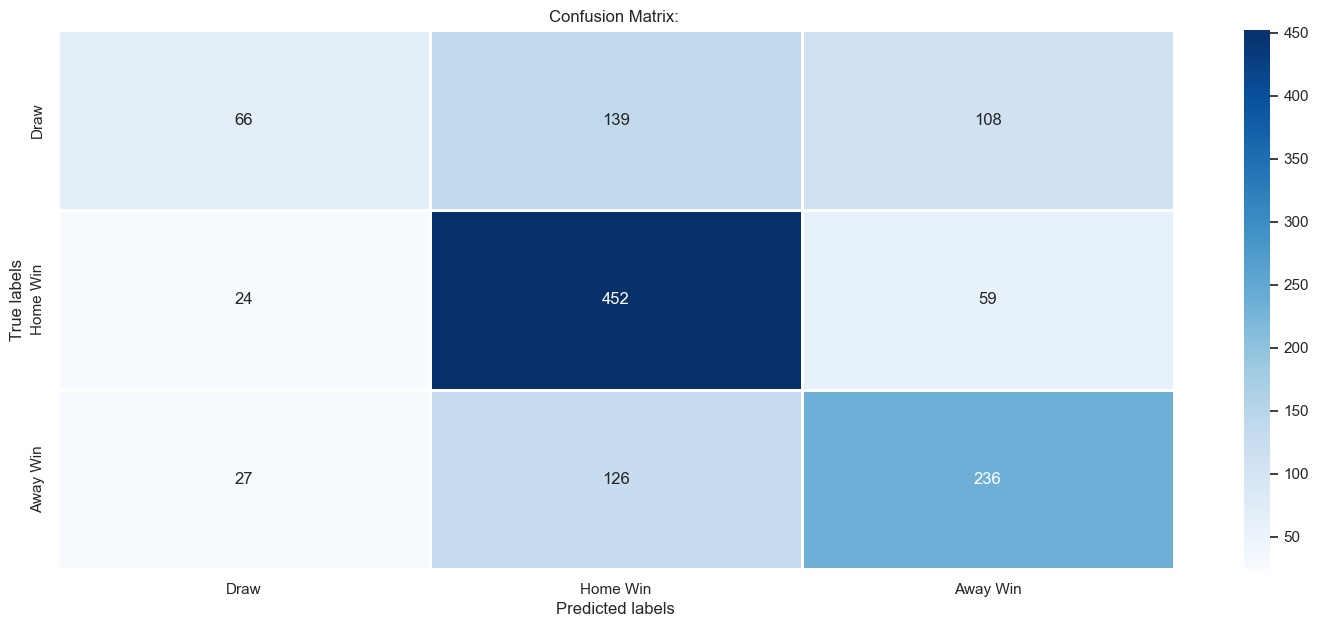

In [28]:
# Feature selection
X_train_fs, X_test_fs, fs = select_features_rf(X_tr_mms, y_train, X_te_mms, 210)
# Model
top_model = LogisticRegression(C=1, max_iter=10000, multi_class='multinomial',solver='sag') 
top_model.fit(X_train_fs, y_train)         
y_pred = top_model.predict(X_test_fs)
# Model's Accuracy and Confusion Matrix
print('Test Accuracy: ', metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_pred, y_test, color_map='Blues')

##### *Plot Sub-Datasets of Origin*

In [29]:
# Compute feature importances
clf = RandomForestClassifier(n_estimators=100, random_state=14)
clf.fit(X_tr_mms, y_train)
feature_names = np.array(X_train.columns.tolist())
sorted_indices = np.argsort(clf.feature_importances_)[::-1][:210]
top_210_feature_names = feature_names[sorted_indices]

# Compute number of selected features from each sub-dataset
venue_count, stand_count, form_count, stat_count, odds_count, team_count,play_count = 0, 0, 0, 0, 0, 0, 0
for i in top_210_feature_names:
    if i in venue_file.columns: venue_count += 1
    elif i in standings_file.columns: stand_count += 1
    elif i in form_file.columns: form_count += 1
    elif i in stats_file.columns: stat_count += 1    
    elif i in odds_file.columns: odds_count += 1
    elif i in team_file.columns: team_count += 1
    elif i in player_file.columns: play_count += 1    

# Store values into a dataframe 
val = np.array([venue_count, stand_count, form_count, stat_count, odds_count, team_count, play_count])
mod_names = np.array(['Venue', 'Standings', 'Form & Rest', 'Stats', 'Odds', 'Team Attributes', 'Player Attributes'])
sorted_indices = np.argsort(val)[::-1]
mod_sort = mod_names[sorted_indices]
data = pd.DataFrame({'Sub-Dataset': mod_sort, 'Number of Features': val[sorted_indices]}) 

# Plot 
plt.figure(figsize=(15,8), dpi=1000)
ax = sns.barplot(x='Sub-Dataset', y='Number of Features', data=data, palette='Blues_r')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
ax.set_xlabel('Sub-Datasets of Origin', fontweight='bold')
ax.set_ylabel('Number of Features', fontweight='bold')
plt.suptitle('Figure 11: Number of Features by Sub-Dataset of Origin', weight='bold', fontsize=18)
ax.set_title('Count of the Features Included in the Comprehensive Model by Sub-Dataset of Origin (Football-Related Information Type)',  fontsize=12, pad=30)
plt.show()